**Importing library**

In [63]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix , classification_report

**Importing dataset**

In [39]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

**verifying shape**

In [40]:
print("X_train shape ",X_train.shape)
print("y_train shape ",y_train.shape)
y_train=y_train.reshape(-1,)
print("y_train shape become  ",y_train.shape)
print("X_test shape ",X_test.shape)
print("y_test shape ",y_test.shape)
y_test=y_test.reshape(-1,)
print("y_test shape become ",y_test.shape)
y_train[:5]

X_train shape  (50000, 32, 32, 3)
y_train shape  (50000, 1)
y_train shape become   (50000,)
X_test shape  (10000, 32, 32, 3)
y_test shape  (10000, 1)
y_test shape become  (10000,)


array([6, 9, 9, 4, 1], dtype=uint8)

Visualizing some data

In [41]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [42]:
def plot_sample(X,y,index):
  plt.figure(figsize=(16,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

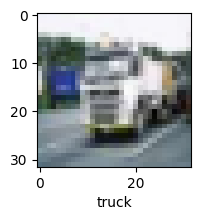

In [43]:
plot_sample(X_train,y_train,1000)

**Normalization**

In [44]:
X_train=X_train / 255

In [45]:
X_test=X_test / 255

**Building an ANN model**

In [57]:
ann_model=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 3000)              9219000   
                                                                 
 dense_7 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_8 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [60]:
ann_model.compile(optimizer='SGD',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [61]:
ann_model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 86s 54ms/step - loss: 1.8142 - accuracy: 0.3536
Epoch 2/5
1563/1563 [==============================] - 85s 55ms/step - loss: 1.6234 - accuracy: 0.4284
Epoch 3/5
1563/1563 [==============================] - 86s 55ms/step - loss: 1.5403 - accuracy: 0.4584
Epoch 4/5
1563/1563 [==============================] - 87s 56ms/step - loss: 1.4795 - accuracy: 0.4791
Epoch 5/5
1563/1563 [==============================] - 94s 60ms/step - loss: 1.4305 - accuracy: 0.4957


In [62]:
ann_model.evaluate(X_test,y_test)

313/313 [==============================] - 6s 17ms/step - loss: 1.6229 - accuracy: 0.4118


[1.6228581666946411, 0.41179999709129333]

In [65]:
y_pred = ann_model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 5s 17ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.37      0.48      1000
           1       0.73      0.36      0.48      1000
           2       0.49      0.11      0.18      1000
           3       0.46      0.14      0.22      1000
           4       0.47      0.25      0.32      1000
           5       0.46      0.24      0.32      1000
           6       0.48      0.51      0.49      1000
           7       0.22      0.89      0.35      1000
           8       0.63      0.62      0.63      1000
           9       0.48      0.62      0.54      1000

    accuracy                           0.41     10000
   macro avg       0.51      0.41      0.40     10000
weighted avg       0.51      0.41      0.40     10000



**Building CNN model**

In [69]:
cnn_model=models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [70]:
cnn_model.compile(optimizer='Adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [72]:
history=cnn_model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.0687 - accuracy: 0.6305
Epoch 2/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9649 - accuracy: 0.6672
Epoch 3/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8897 - accuracy: 0.6911
Epoch 4/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8303 - accuracy: 0.7124
Epoch 5/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7810 - accuracy: 0.7290
Epoch 6/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7335 - accuracy: 0.7466
Epoch 7/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.6918 - accuracy: 0.7601
Epoch 8/10
1563/1563 [==============================] - 45s 28ms/step - loss: 0.6506 - accuracy: 0.7734
Epoch 9/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.6187 - accuracy: 0.7849
Epoch 10/10
1563/1563 [==============================] - 45s 29m

Text(0.5, 1.0, 'model loss')

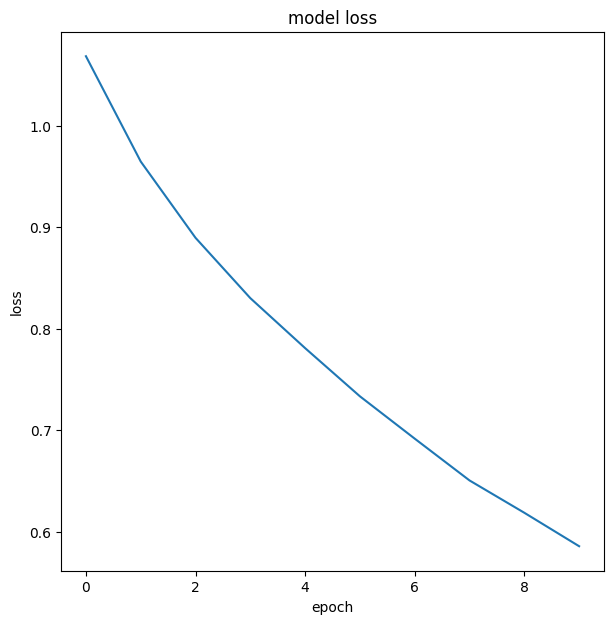

In [77]:
plt.figure(figsize=(7,7))
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model loss')

Text(0.5, 1.0, 'model accuracy')

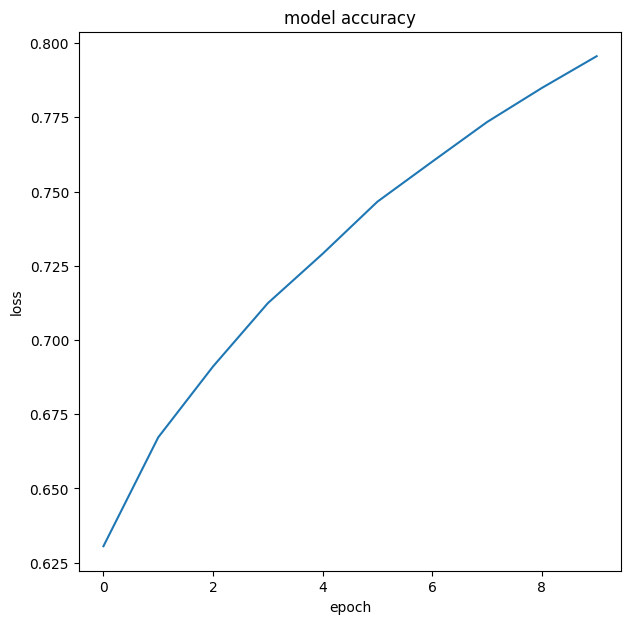

In [78]:
plt.figure(figsize=(7,7))
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model accuracy')

In [80]:
cnn_model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9545 - accuracy: 0.6951


[0.9544682502746582, 0.6951000094413757]

In [85]:
y_pred=cnn_model.predict(X_test)

313/313 [==============================] - 3s 9ms/step


In [88]:
y_classes=[np.argmax(element) for element in y_pred]

In [89]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.65      0.72      1000
           1       0.86      0.76      0.81      1000
           2       0.59      0.53      0.56      1000
           3       0.53      0.52      0.52      1000
           4       0.62      0.66      0.64      1000
           5       0.62      0.62      0.62      1000
           6       0.67      0.86      0.75      1000
           7       0.72      0.76      0.74      1000
           8       0.77      0.83      0.80      1000
           9       0.81      0.75      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000

